In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [3]:
df = pd.read_csv("medical_examination.csv")

#Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by #dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the #Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [4]:
weight = df['weight']
height = df['height'] / 100
BMI = weight / height**2

#a if a < b else b
df['overweight'] = BMI.apply(lambda x: 1 if x > 25 else 0)
df.to_csv('medical_examination.csv', index=False)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df['cholesterol'] = df['cholesterol'].apply(lambda x:1 if x == 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x:1 if x == 1 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [22]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 
    #'gluc', 'smoke', 'alco', 'active', and 'overweight'. id_vars=None, value_vars=None
    
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 
    'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    #You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.DataFrame(df_cat.groupby(["variable", "value", "cardio"])["value"].count()).rename(columns={"value": "total"}).reset_index()
    
    # Draw the catplot with 'sns.catplot()'
    sns.catplot(x = "variable", y = "total", hue = "value", kind = "bar",col = "cardio", data = df_cat)

/home/quanbwoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


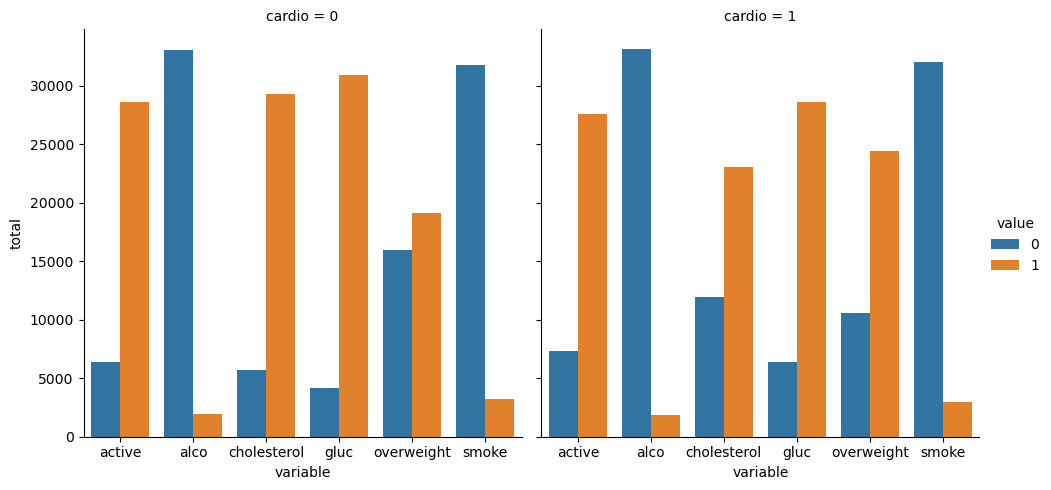

In [23]:
draw_cat_plot()

In [74]:
def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df["height"] >= df["height"].quantile(0.025)) &
        (df["height"] <= df["height"].quantile(0.975)) &
        (df["weight"] >= df["weight"].quantile(0.025)) & 
        (df["weight"] <= df["weight"].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 12))
    
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)

In [8]:
draw_heat_map()

NameError: name 'draw_heat_map' is not defined

In [10]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 
    'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [11]:
df_cat

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [12]:
 df_cat = pd.DataFrame(df_cat.groupby(["variable", "value", "cardio"])["value"].count()).rename(columns={"value": "total"}).reset_index()

In [13]:
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,5691
9,cholesterol,0,1,11924
